## Day 17 Discussions

## More Pandas

#### Wikipedia:

A data set (or dataset) is a collection of data. Most commonly a data set corresponds to the contents of a single database table, or a single statistical data matrix, where every column of the table represents a particular variable, and each row corresponds to a given member of the data set in question.

In [88]:
import pandas as pd

In [89]:
df = pd.DataFrame({"name":["Rodrigo Duterte","Leni Robredo","Tito Sotto","Peter Cayetano","Nancy Binay"],
                  "mobile":["+63917 8999990", "+63918 8995555", "+63917 7790000", "+63918 8991234","+63927 2222222"]})
df

,name,mobile
0,Rodrigo Duterte,+63917 8999990
1,Leni Robredo,+63918 8995555
2,Tito Sotto,+63917 7790000
3,Peter Cayetano,+63918 8991234
4,Nancy Binay,+63927 2222222


In [90]:
# Add columns
df["gender"] = ["Male","Female","Male","Male","Female"]
df.columns

Index(['name', 'mobile', 'gender'], dtype='object')

In [91]:
df

,name,mobile,gender
0,Rodrigo Duterte,+63917 8999990,Male
1,Leni Robredo,+63918 8995555,Female
2,Tito Sotto,+63917 7790000,Male
3,Peter Cayetano,+63918 8991234,Male
4,Nancy Binay,+63927 2222222,Female


In [92]:
# Add rows
df = df.append({"name":"Manny Pacquiao","gender":"Male","mobile":"+63927 1234567"}, ignore_index=True)
df

,name,mobile,gender
0,Rodrigo Duterte,+63917 8999990,Male
1,Leni Robredo,+63918 8995555,Female
2,Tito Sotto,+63917 7790000,Male
3,Peter Cayetano,+63918 8991234,Male
4,Nancy Binay,+63927 2222222,Female
5,Manny Pacquiao,+63927 1234567,Male


In [93]:
# substitute
df.loc[:,"mobile"].replace(r"^\+63","0",regex=True)

0    0917 8999990
1    0918 8995555
2    0917 7790000
3    0918 8991234
4    0927 2222222
5    0927 1234567
Name: mobile, dtype: object

In [94]:
df

,name,mobile,gender
0,Rodrigo Duterte,+63917 8999990,Male
1,Leni Robredo,+63918 8995555,Female
2,Tito Sotto,+63917 7790000,Male
3,Peter Cayetano,+63918 8991234,Male
4,Nancy Binay,+63927 2222222,Female
5,Manny Pacquiao,+63927 1234567,Male


In [95]:
df.loc[:,"mobile"].replace(r"^\+63","0",regex=True, inplace=True)

In [96]:
df

,name,mobile,gender
0,Rodrigo Duterte,0917 8999990,Male
1,Leni Robredo,0918 8995555,Female
2,Tito Sotto,0917 7790000,Male
3,Peter Cayetano,0918 8991234,Male
4,Nancy Binay,0927 2222222,Female
5,Manny Pacquiao,0927 1234567,Male


In [97]:
# Alternative: use apply
import re

df.loc[:,"mobile"].apply(lambda x: re.sub(r"^0","+63", x) )

0    +63917 8999990
1    +63918 8995555
2    +63917 7790000
3    +63918 8991234
4    +63927 2222222
5    +63927 1234567
Name: mobile, dtype: object

In [98]:
df.loc[:,"mobile"] = df.loc[:,"mobile"].apply(lambda x: re.sub(r"^0","+63", x) )

In [99]:
df

,name,mobile,gender
0,Rodrigo Duterte,+63917 8999990,Male
1,Leni Robredo,+63918 8995555,Female
2,Tito Sotto,+63917 7790000,Male
3,Peter Cayetano,+63918 8991234,Male
4,Nancy Binay,+63927 2222222,Female
5,Manny Pacquiao,+63927 1234567,Male


In [100]:
# Add a column based on values from existing ones
df.loc[:,"mobile"].str[0:6]

0    +63917
1    +63918
2    +63917
3    +63918
4    +63927
5    +63927
Name: mobile, dtype: object

In [101]:
carrier = {"+63917":"Globe","+63918":"Smart", "+63927":"Globe"}
carrier["+63917"]

'Globe'

In [102]:
df.loc[:,"mobile"].str[0:6].apply(lambda x: carrier[x])


0    Globe
1    Smart
2    Globe
3    Smart
4    Globe
5    Globe
Name: mobile, dtype: object

In [103]:
df["carrier"] = df.loc[:,"mobile"].str[0:6].apply(lambda x: carrier[x])
df

,name,mobile,gender,carrier
0,Rodrigo Duterte,+63917 8999990,Male,Globe
1,Leni Robredo,+63918 8995555,Female,Smart
2,Tito Sotto,+63917 7790000,Male,Globe
3,Peter Cayetano,+63918 8991234,Male,Smart
4,Nancy Binay,+63927 2222222,Female,Globe
5,Manny Pacquiao,+63927 1234567,Male,Globe


In [104]:
# Group By
df.groupby(["gender","carrier"]).count()

name  mobile
gender carrier              
Female Globe       1       1
       Smart       1       1
Male   Globe       3       3
       Smart       1       1

In [105]:
group_df = df.groupby(["gender","carrier"])["name"].count()
group_df

gender  carrier
Female  Globe      1
        Smart      1
Male    Globe      3
        Smart      1
Name: name, dtype: int64

In [106]:
type(group_df)

pandas.core.series.Series

In [107]:
group_df.index[0]

('Female', 'Globe')

In [108]:
group_df[('Female','Smart')]

1

In [109]:
group_df[('Male','Smart')]

1

In [110]:
group_df[('Male','Globe')]

3

#### Prepare another dataframe

In [135]:
ratings_df = pd.DataFrame({"mobile":["+63927 1234567","+63917 8999990", "+63927 2222222"],
                           "rating":[4.0,4.0,5.0]
                          })

In [136]:
ratings_df

,mobile,rating
0,+63927 1234567,4.0
1,+63917 8999990,4.0
2,+63927 2222222,5.0


#### Merge Dataframes

In [137]:
pd.merge(df, ratings_df, left_on=["mobile"], right_on=["mobile"])

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Nancy Binay,+63927 2222222,Female,Globe,5.0
2,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


In [138]:
pd.merge(df, ratings_df, how="left", left_on=["mobile"], right_on=["mobile"])

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Leni Robredo,+63918 8995555,Female,Smart,NaN
2,Tito Sotto,+63917 7790000,Male,Globe,NaN
3,Peter Cayetano,+63918 8991234,Male,Smart,NaN
4,Nancy Binay,+63927 2222222,Female,Globe,5.0
5,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


In [139]:
merged_df = pd.merge(df, ratings_df, how="left", left_on=["mobile"], right_on=["mobile"])
merged_df

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Leni Robredo,+63918 8995555,Female,Smart,NaN
2,Tito Sotto,+63917 7790000,Male,Globe,NaN
3,Peter Cayetano,+63918 8991234,Male,Smart,NaN
4,Nancy Binay,+63927 2222222,Female,Globe,5.0
5,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


In [140]:
merged_df.fillna(0)

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Leni Robredo,+63918 8995555,Female,Smart,0.0
2,Tito Sotto,+63917 7790000,Male,Globe,0.0
3,Peter Cayetano,+63918 8991234,Male,Smart,0.0
4,Nancy Binay,+63927 2222222,Female,Globe,5.0
5,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


In [141]:
merged_df

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Leni Robredo,+63918 8995555,Female,Smart,NaN
2,Tito Sotto,+63917 7790000,Male,Globe,NaN
3,Peter Cayetano,+63918 8991234,Male,Smart,NaN
4,Nancy Binay,+63927 2222222,Female,Globe,5.0
5,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


In [142]:
merged_df.fillna(0,inplace=True)
merged_df

,name,mobile,gender,carrier,rating
0,Rodrigo Duterte,+63917 8999990,Male,Globe,4.0
1,Leni Robredo,+63918 8995555,Female,Smart,0.0
2,Tito Sotto,+63917 7790000,Male,Globe,0.0
3,Peter Cayetano,+63918 8991234,Male,Smart,0.0
4,Nancy Binay,+63927 2222222,Female,Globe,5.0
5,Manny Pacquiao,+63927 1234567,Male,Globe,4.0


<BarContainer object of 6 artists>

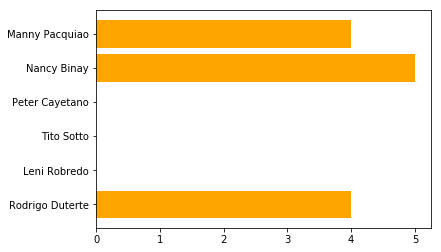

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.barh(width=merged_df.loc[:,"rating"], y=merged_df.loc[:,"name"], color="Orange")


#### Reporting or generating dynamic text



In [157]:
html = """
<html>
   <table>
       <tr><th>Name</th><th>Rating</th><tr>
       {}
   </table>
</html>
"""

In [158]:
# prepare <td> lines
merged_df.loc[:,["name","rating"]].apply(lambda x: x[0]+str(x[1]), axis=1) # note the axis parameter

0    Rodrigo Duterte4.0
1       Leni Robredo0.0
2         Tito Sotto0.0
3     Peter Cayetano0.0
4        Nancy Binay5.0
5     Manny Pacquiao4.0
dtype: object

In [159]:
merged_df.loc[:,["name","rating"]].apply(lambda x: "<tr><td>{}</td><td>{}</td></tr>".format(x[0],str(x[1])), axis=1)

0    <tr><td>Rodrigo Duterte</td><td>4.0</td></tr>
1       <tr><td>Leni Robredo</td><td>0.0</td></tr>
2         <tr><td>Tito Sotto</td><td>0.0</td></tr>
3     <tr><td>Peter Cayetano</td><td>0.0</td></tr>
4        <tr><td>Nancy Binay</td><td>5.0</td></tr>
5     <tr><td>Manny Pacquiao</td><td>4.0</td></tr>
dtype: object

In [160]:
td_string = "".join(merged_df.loc[:,["name","rating"]].apply(lambda x: "<tr><td>{}</td><td>{}</td></tr>".format(x[0],str(x[1])), axis=1))
td_string

'<tr><td>Rodrigo Duterte</td><td>4.0</td></tr><tr><td>Leni Robredo</td><td>0.0</td></tr><tr><td>Tito Sotto</td><td>0.0</td></tr><tr><td>Peter Cayetano</td><td>0.0</td></tr><tr><td>Nancy Binay</td><td>5.0</td></tr><tr><td>Manny Pacquiao</td><td>4.0</td></tr>'

In [161]:
html.format(td_string)
html

'\n<html>\n   <table>\n       <tr><th>Name</th><th>Rating</th><tr>\n       {}\n   </table>\n</html>\n'

In [162]:
from IPython.core.display import HTML
HTML(html.format(td_string))

Name,Rating
Rodrigo Duterte,4.0
Leni Robredo,0.0
Tito Sotto,0.0
Peter Cayetano,0.0
Nancy Binay,5.0
Manny Pacquiao,4.0


## Network Analysis

To do in class: Discuss basic graph theory, nodes and edges

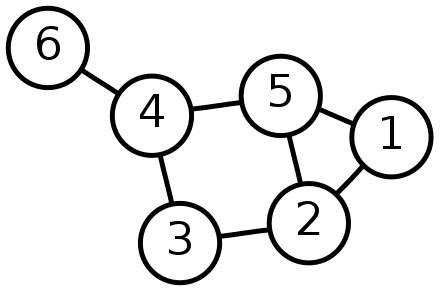

From [Wikipedia](https://en.wikipedia.org/wiki/Graph_theory):

In mathematics, graph theory is the study of graphs, which are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines). A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically; see Graph (discrete mathematics) for more detailed definitions and for other variations in the types of graph that are commonly considered. Graphs are one of the prime objects of study in discrete mathematics.

In one more general sense of the term allowing multiple edges,[3][4] a graph is an ordered triple G = (V, E, ϕ) comprising:

V a set of vertices (also called nodes or points);
E a set of edges (also called links or lines);

In [113]:
import networkx as nx

In [114]:
G=nx.Graph()

In [115]:
G

In [116]:
G.add_node("@jobenilagan")

In [117]:
G.add_nodes_from(["@joeilagan","@eeebieee"])

In [118]:
G.add_node("@chums")

In [119]:
G

#### Add edges

In [120]:
G.add_edge("@jobenilagan","@joeilagan",reltype="follower")

In [121]:
e=("@jobenilagan","@eeebieee")
G.add_edge(*e,reltype="follower")

In [122]:
G.add_edges_from([("@chums","@jobenilagan"),("@joeilagan","@jobenilagan")])

#### Graph Statistics

In [123]:
G.number_of_nodes()

4

In [124]:
G.number_of_edges()

3

In [125]:
G.nodes()

NodeView(('@jobenilagan', '@joeilagan', '@eeebieee', '@chums'))

In [126]:
[n for n in G.nodes()]

['@jobenilagan', '@joeilagan', '@eeebieee', '@chums']

In [127]:
G.nodes["@jobenilagan"]["profile"]={"name":"Joben Ilagan","course":"BSME"}
G.nodes["@chums"]["profile"]={"name":"Matthew Uy","course":"BSME"}
G.nodes["@joeilagan"]["profile"]={"name":"Joe Ilagan","course":"BSME"}
G.nodes["@eeebieee"]["profile"]={"name":"Elizabeth Ilagan","course":"BSCMT"}

In [128]:
nx.get_node_attributes(G,'profile')

{'@jobenilagan': {'name': 'Joben Ilagan', 'course': 'BSME'},
 '@joeilagan': {'name': 'Joe Ilagan', 'course': 'BSME'},
 '@eeebieee': {'name': 'Elizabeth Ilagan', 'course': 'BSCMT'},
 '@chums': {'name': 'Matthew Uy', 'course': 'BSME'}}

In [129]:
nx.get_node_attributes(G,'profile')["@jobenilagan"]["name"]

'Joben Ilagan'

In [130]:
[e for e in G.edges()]

[('@jobenilagan', '@joeilagan'),
 ('@jobenilagan', '@eeebieee'),
 ('@jobenilagan', '@chums')]

In [131]:
G.edges()

EdgeView([('@jobenilagan', '@joeilagan'), ('@jobenilagan', '@eeebieee'), ('@jobenilagan', '@chums')])

In [132]:
nx.get_edge_attributes(G,'reltype')

{('@jobenilagan', '@joeilagan'): 'follower',
 ('@jobenilagan', '@eeebieee'): 'follower'}

#### Adding attributes

### Drawing Graphs

In [133]:
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


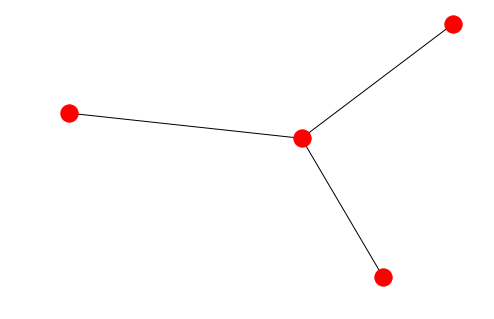

In [134]:
nx.draw(G)

In [135]:
 plt.show()

### Exercise: Load the whole class to the graph
